In [1]:
#Sebastian Russo 79117092
#Artificial Intelligence

#Import necessary libraries
#Library to manipulate and analyze datasets 
import pandas as pd 

#------------------------------------------------------------------------------------------------
#Import logistic regression model using the training set and required metrics
#Library to import only to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

#self-explanatory
from sklearn.linear_model import LogisticRegression 

#From the metrics module, import accurracy, f1, precision, recall
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#From the metrics module, import classifier report
from sklearn.metrics import classification_report
#------------------------------------------------------------------------------------------------
#Imports for Confusion Matrix and other data visualization
#Library to make python matplotlib work like MATLAB
import matplotlib.pyplot as plt  

#Library for confusion matrix visualization
from sklearn.metrics import confusion_matrix  

#Library for data visualization and correlation matrix
import seaborn as sns 

#To save the trained model
import os
import joblib

In [2]:
#Import data set
df_titanic_survivors= pd.read_csv("titanic_dataset.csv",index_col=0) 
#Nothing else necessary since it is a .csv, has header and "," as delimiters
#index_col=0 will set the column at location 0 as the index for all rows in the dataset

#View shape of dataset
print(df_titanic_survivors.shape)

#Analyze dataset
df_titanic_survivors.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Check if there is any missing values in the data (should always be done in large datasets)
num_missing_values=df_titanic_survivors.isna().sum()

#Print to see the missing values
print(num_missing_values)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [4]:
#Clean data by replacing missing values, drop unnecessary columns or columns with too many missing 
#values, convert categorical data into num variables

#Replace missing values in Age column with the median
df_titanic_survivors["Age"]=df_titanic_survivors["Age"].fillna(df_titanic_survivors["Age"].median())

#Drop Cabin column because it has too many missing values and it's not really important 
df_titanic_survivors=df_titanic_survivors.drop("Cabin",axis=1)

#If a value in Embarked is missing, replace with most frequent value in said column
df_titanic_survivors['Embarked'] = df_titanic_survivors['Embarked'].fillna(df_titanic_survivors['Embarked'].value_counts().idxmax())


#Convert categorical data into numerical variables
df_titanic_survivors["Sex"]= df_titanic_survivors["Sex"].map({"male":0,"female":1})
df_titanic_survivors["Embarked"]= df_titanic_survivors["Embarked"].map({"C":0, "Q":1, "S":2})

#Analyze dataset
df_titanic_survivors.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [5]:
#Split dataset into features for independent_ and dependent_ 
independent_variable=df_titanic_survivors[["Pclass","Sex","Age"]]
dependent_variable=df_titanic_survivors["Survived"]

#Check size for both 
print("Independent variables:",independent_variable.shape)

print("Dependent variables:",dependent_variable.shape)

Independent variables: (891, 3)
Dependent variables: (891,)


In [6]:
#Split the Independent and Dependent variables into training and testing sets (75%, 25%)
independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent_variable,
                                                                                        dependent_variable,
                                                                                        test_size=0.25,
                                                                                        random_state=1)

#Verify the shape for each split
print("independent_train set:",independent_train.shape)
print("independent_test set:",independent_test.shape)
print("dependent_train set:",dependent_train.shape)
print("dependent_test set:",dependent_test.shape)

independent_train set: (668, 3)
independent_test set: (223, 3)
dependent_train set: (668,)
dependent_test set: (223,)


In [ ]:
#Create a model to classify death or survival outcome and train it
log_reg_classifier= LogisticRegression(max_iter=50)
log_reg_classifier.fit(independent_train,dependent_train)

#Create the folder if it doesn't exist
os.makedirs('trained_model', exist_ok=True)

#Save the model inside the folder
joblib.dump(log_reg_classifier, 'trained_model/log_reg_classifier_titanic.pkl')

['trained_model/log_reg_classifier.pkl']

In [8]:
#Predict the outcome
predicted_dependent= log_reg_classifier.predict(independent_test)

#Check real values vs the predicted values
print("Actual values",dependent_test.values[0:30])
print("Predict values",predicted_dependent[0:30])

Actual values [1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1]
Predict values [1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1]


Simple confusion Matrix
[[109  19]
 [ 24  71]]


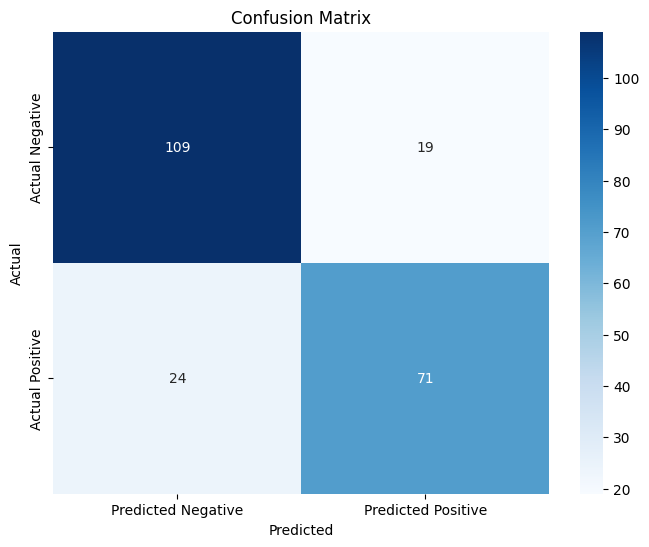

In [9]:
#Create confusion matrix
confusion_matrix=confusion_matrix(dependent_test,predicted_dependent)

#Print confusion matrix
print("Simple confusion Matrix")
print(confusion_matrix)

#Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d',
            cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
#Check accuracy of this model
accuracy= accuracy_score(dependent_test,predicted_dependent) #Ranges (0,1), the closer to 1 the better
print("Accuracy: ",accuracy)

# Calculate precision
precision = precision_score(dependent_test, predicted_dependent)
print('Precision:', precision)

# Calculate recall
recall = recall_score(dependent_test, predicted_dependent)
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(dependent_test, predicted_dependent)
print('F1 Score:', f1)

# Print the classification report
classification_report= classification_report(dependent_test,predicted_dependent)
print(classification_report)

Accuracy:  0.8071748878923767
Precision: 0.7888888888888889
Recall: 0.7473684210526316
F1 Score: 0.7675675675675676
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       128
           1       0.79      0.75      0.77        95

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

